# Title:  Predictive Modeling for Insurance Loss Estimation


## Introduction

#### The notebook is intended to cover the following concepts
<ul>
<li>Business problem</li>
<li>Dataset overview</li>
<li>Exploratory data analysis</li>
<li>Data cleaning and Pre-Processing</li>
<li>Outlier treatment</li>
<li>Feature selection techniques</li>
<li>Machine learning models</li>
<li>Hyperparameter tuning</li>
<li>Model validation</li>
<li>Deployment using Flask API</li>
</ul>


##  1: Installing and Importing Necessary Libraries

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install scikit-learn
# !pip install seaborn
# !pip install Flask

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from zipfile import ZipFile
import urllib.request
from io import BytesIO

from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

import pickle
import os

In [3]:

import warnings
warnings.filterwarnings("ignore", category=FutureWarning) # Filter out the FutureWarning related to is_categorical_dtype


In [4]:

# Modify the display options to view the entire dataframe
pd.options.display.max_columns = None


##  2: Loading the Data

In [5]:

# Define the URL of a remote zip file containing a dataset and open it
folder = urllib.request.urlopen('https://s3.amazonaws.com/hackerday.datascience/50/dataset.zip')

# Create a ZipFile object from the binary data retrieved from the URL
zipfile = ZipFile(BytesIO(folder.read()))

# Retrieve the list of file names contained within the zip archive
file_names = zipfile.namelist()


In [6]:
# Read the 'train.csv' file from the zip archive into a pandas DataFrame for further processing.
train_data = pd.read_csv(zipfile.open("train.csv"))
train_data

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,587620,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,B,A,A,A,D,B,C,B,D,B,B,C,B,B,B,A,A,A,A,A,D,D,D,E,E,A,P,I,D,A,A,D,E,J,G,B,BI,EG,A,G,BM,A,L,CK,0.347403,0.785784,0.613660,0.473202,0.939556,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
188314,587624,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,A,C,B,B,B,A,A,A,A,A,D,D,D,E,C,A,P,K,A,A,A,E,E,H,F,B,BI,BT,A,AV,AU,E,J,DF,0.507661,0.555782,0.549770,0.802892,0.704268,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
188315,587630,A,B,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,

In [7]:

# Display the size of the training data
train_data.shape

(188318, 132)

In [8]:

# Display the first few observations
train_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [9]:

# Get the column names
column_names = np.array(train_data.columns)
column_names

array(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14',
       'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21',
       'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28',
       'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35',
       'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42',
       'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49',
       'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56',
       'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63',
       'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70',
       'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77',
       'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84',
       'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91',
       'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98',
       'cat99', 'cat100

##  3: Data Analysis and Preprocessing

In [10]:
# Identify categorical and numerical columns
column_datatypes = train_data.dtypes
categorical_columns = list(column_datatypes[column_datatypes == "object"].index.values)
continuous_columns = list(column_datatypes[column_datatypes == "float64"].index.values)
continuous_columns.remove('loss')
continuous_columns

['cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14']

In [11]:

# Check the distribution of categorical variables
def category_distribution(train_data, categorical_columns):
    categorical_column_distribution = list()
    for cat_column in categorical_columns:
        categorical_column_distribution.append(train_data[cat_column].value_counts())
    return categorical_column_distribution

categorical_column_distribution = category_distribution(train_data, categorical_columns)
categorical_column_distribution


[cat1
 A    141550
 B     46768
 Name: count, dtype: int64,
 cat2
 A    106721
 B     81597
 Name: count, dtype: int64,
 cat3
 A    177993
 B     10325
 Name: count, dtype: int64,
 cat4
 A    128395
 B     59923
 Name: count, dtype: int64,
 cat5
 A    123737
 B     64581
 Name: count, dtype: int64,
 cat6
 A    131693
 B     56625
 Name: count, dtype: int64,
 cat7
 A    183744
 B      4574
 Name: count, dtype: int64,
 cat8
 A    177274
 B     11044
 Name: count, dtype: int64,
 cat9
 A    113122
 B     75196
 Name: count, dtype: int64,
 cat10
 A    160213
 B     28105
 Name: count, dtype: int64,
 cat11
 A    168186
 B     20132
 Name: count, dtype: int64,
 cat12
 A    159825
 B     28493
 Name: count, dtype: int64,
 cat13
 A    168851
 B     19467
 Name: count, dtype: int64,
 cat14
 A    186041
 B      2277
 Name: count, dtype: int64,
 cat15
 A    188284
 B        34
 Name: count, dtype: int64,
 cat16
 A    181843
 B      6475
 Name: count, dtype: int64,
 cat17
 A    187009
 B      1309


In [12]:
# Calculate the length of each element in 'categorical_column_distribution' and store in 'length_categorical_columns'.
length_categorical_columns = list(map(lambda x:len(x),categorical_column_distribution))
len(length_categorical_columns)

116

In [13]:

# Count the number of columns having the same number of unique values
distribution_dict = dict()
for val in length_categorical_columns:
    if val in distribution_dict.keys():
        count = distribution_dict[val]
        distribution_dict[val] = count+1
    else:
        distribution_dict[val]=1

distribution_dict

{2: 72,
 3: 4,
 4: 12,
 8: 3,
 7: 4,
 5: 3,
 16: 2,
 15: 1,
 19: 2,
 9: 1,
 13: 1,
 17: 2,
 20: 2,
 11: 1,
 84: 1,
 131: 1,
 51: 1,
 61: 1,
 23: 1,
 326: 1}

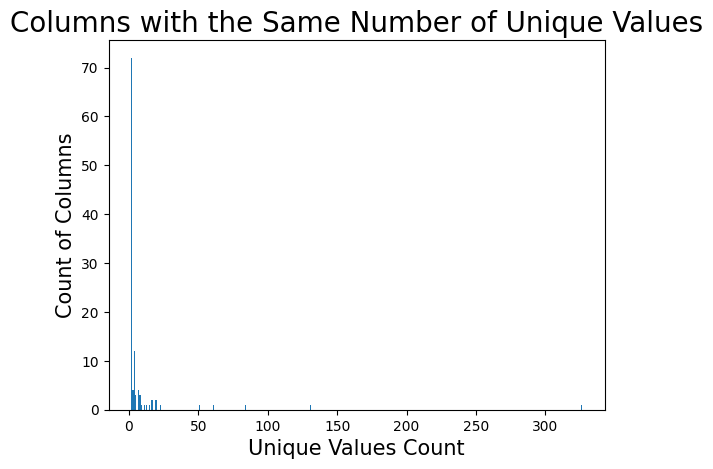

In [14]:

# Plot a bar graph to visualize the count of columns with the same number of unique values.
keys = distribution_dict.keys()
values = distribution_dict.values()
plt.bar(keys, values, width=0.8)

# Label the axes and add a title to the plot.
plt.xlabel('Unique Values Count', fontsize=15)
plt.ylabel('Count of Columns', fontsize=15)
plt.title('Columns with the Same Number of Unique Values', fontsize=20)

# Set the figure size to a specific dimension (48cm x 10cm).
plt.rcParams['figure.figsize'] = [48, 10]

# Display the plot.
plt.show()


In [15]:

# Check the distribution of continuous variables and view descriptive statistics
train_data[continuous_columns].describe()


,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


##  4: Data Cleaning and Preprocessing

In [16]:
# Check for missing values in the columns
#value of 0 indicates no missing values
missing_values = train_data.isnull().sum()
np.max(missing_values)


0

In [17]:

# Manually insert blank values across 5 rows in random columns
total_rows = train_data.shape[0]
columns_with_blanks_cat = np.random.randint(1, 116, 2)
columns_with_blanks_cont = np.random.randint(117, 130, 3)
columns_with_blank = np.append(columns_with_blanks_cat, columns_with_blanks_cont)

# For every column, insert 5 blanks at random locations
for col in columns_with_blank:
    rows_with_blanks = np.random.randint(1,total_rows,5)
    train_data.iloc[rows_with_blanks,col] = np.nan

In [18]:

# Validate the number of columns with missing values
missing_values = train_data.isnull().sum()
np.max(missing_values)


5

In [19]:

# Display the columns with missing values
columns_with_missing = train_data.columns[train_data.isnull().any()]
columns_with_missing


Index(['cat58', 'cat82', 'cont6', 'cont9', 'cont12'], dtype='object')

##  5: Data Preprocessing Class

#### Data Preprocessing class with the following functions:
- **missing_value_continuous**:
  - This function is designed to handle missing values specifically for continuous variables in a dataset.
  - It likely employs techniques such as imputation or removal of rows/columns with missing values, depending on the context.
- **missing_value_categorical**:
  - This function is intended for handling missing values in categorical variables within a dataset.
  - It may use methods like imputation with mode or a separate category for missing values.
- **outlier_treatment**:
  - The purpose of this function is to address outliers in continuous variables.
  - It typically involves identifying and potentially transforming or removing data points that fall outside a defined range or threshold.

These functions are crucial for data preprocessing and ensuring the quality and reliability of your dataset before applying machine learning algorithms.


In [20]:
# Define a Data_preprocessing class with functions for missing value handling and outlier treatment
class Data_preprocessing:
    def __init__(self, train_data):
        self.train_data = train_data

    def missing_value_continuous(self, column_names_with_specific_type, imputation_type="mean"):
        # Handle missing values in continuous variables
        if imputation_type=="mean":
            mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
            mean_imputer.fit(self.train_data[column_names_with_specific_type])
            self.train_data[column_names_with_specific_type]=mean_imputer.transform(self.train_data[column_names_with_specific_type])
        if imputation_type=="median":
            median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
            median_imputer.fit(self.train_data[column_names_with_specific_type])
            self.train_data[column_names_with_specific_type]=median_imputer.transform(self.train_data[column_names_with_specific_type])
        return self.train_data

    def missing_value_categorical(self, column_names_with_specific_type, imputation_type="most_frequent"):
        # Handle missing values in categorical variables
        most_frequent = SimpleImputer(strategy="most_frequent")
        most_frequent.fit(self.train_data[column_names_with_specific_type])
        self.train_data[column_names_with_specific_type] = most_frequent.transform(train_data[column_names_with_specific_type])
        return self.train_data

    def outlier_treatment(self, Q1, Q3, IQR, columns_with_outlier, action):
        # Handle continuous outliers in the dataset
        if action=="median":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                meadian_outlier = np.median(self.train_data[column_name])
                self.train_data.loc[self.train_data[((self.train_data[column_name]<(Q1[column_name]-(1.5*IQR[column_name])))|(self.train_data[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))))].index,column_name]=meadian_outlier
        if action=="mean":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                mean_outlier = np.mean(self.train_data[column_name])
                self.train_data.loc[self.train_data[((self.train_data[column_name]<(Q1[column_name]-(1.5*IQR[column_name])))|(self.train_data[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))))].index,column_name]=mean_outlier
        if action=="remove":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                self.train_data = self.train_data[~((self.train_data[column_name]<(Q1[column_name]-(1.5*IQR[column_name])))|(self.train_data[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))))]
        return self.train_data


In [21]:

# Initialize the Data_preprocessing class
Data_preprocessing_obj = Data_preprocessing(train_data)

# Handle missing values in continuous variables (use "median" or "mean")
train_data = Data_preprocessing_obj.missing_value_continuous(continuous_columns, "median")

# Handle missing values in categorical variables
train_data = Data_preprocessing_obj.missing_value_categorical(categorical_columns)
train_data

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,587620,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,B,A,A,A,D,B,C,B,D,B,B,C,B,B,B,A,A,A,A,A,D,D,D,E,E,A,P,I,D,A,A,D,E,J,G,B,BI,EG,A,G,BM,A,L,CK,0.347403,0.785784,0.613660,0.473202,0.939556,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
188314,587624,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,A,C,B,B,B,A,A,A,A,A,D,D,D,E,C,A,P,K,A,A,A,E,E,H,F,B,BI,BT,A,AV,AU,E,J,DF,0.507661,0.555782,0.549770,0.802892,0.704268,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
188315,587630,A,B,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,

In [22]:
# Filter out the continuous columns and view descriptive statistics
train_data[continuous_columns].describe()


,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490943,0.484970,0.486437,0.485507,0.498066,0.493511,0.493153,0.493138,0.495717
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205269,0.178450,0.199370,0.181658,0.185877,0.209737,0.209424,0.212777,0.222488
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.654490,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


##  6: Handling Outliers

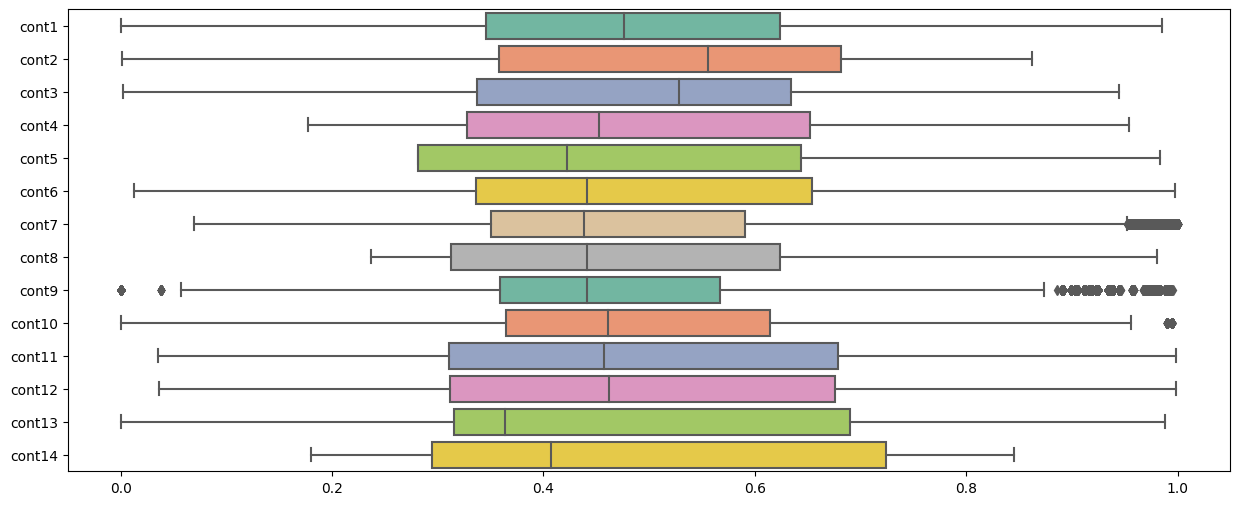

In [23]:

# Visualize outliers using boxplots
plt.figure(figsize=(15, 6))
ax = sns.boxplot(data=train_data[continuous_columns], orient="h", palette="Set2")


In [24]:

# Define columns with outliers
columns_with_outlier = ['cont7', 'cont9', 'cont10']

# Compute the interquartile range (IQR) for all continuous columns
Q1 = train_data[continuous_columns].quantile(0.25)
Q3 = train_data[continuous_columns].quantile(0.75)
IQR = (Q3 - Q1)

# Handle outliers using the Data_preprocessing class
train_data = Data_preprocessing_obj.outlier_treatment(Q1, Q3, IQR, columns_with_outlier, "median")
train_data


,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,587620,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,B,A,A,A,D,B,C,B,D,B,B,C,B,B,B,A,A,A,A,A,D,D,D,E,E,A,P,I,D,A,A,D,E,J,G,B,BI,EG,A,G,BM,A,L,CK,0.347403,0.785784,0.613660,0.473202,0.939556,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
188314,587624,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,A,C,B,B,B,A,A,A,A,A,D,D,D,E,C,A,P,K,A,A,A,E,E,H,F,B,BI,BT,A,AV,AU,E,J,DF,0.507661,0.555782,0.549770,0.802892,0.704268,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
188315,587630,A,B,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,

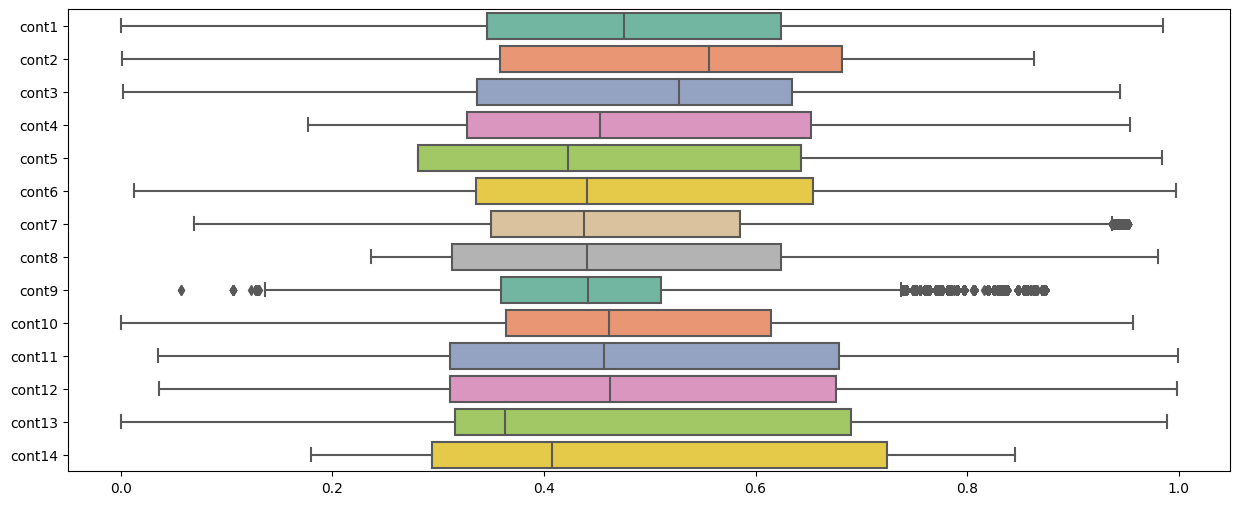

In [25]:

# Visualize outliers after treatment
plt.figure(figsize=(15, 6))
ax = sns.boxplot(data=train_data[continuous_columns], orient="h", palette="Set2")


##  7: Feature Selection for Numerical Variables

The below code defines a Python function for feature selection of numerical variables in a dataset. The function performs several steps to identify and remove irrelevant or redundant features.

### Function Details

- **Function Name**: `feature_selection_numerical_variables`
- **Parameters**:
  - `train_data`: The input DataFrame containing the dataset with numerical variables.
  - `qthreshold`: The threshold for quasi-constant variance filtering.
  - `corr_threshold`: The threshold for identifying correlated variables.
  - `exclude_numerical_cols_list`: A list of numerical columns to exclude from the feature selection process.

### Steps Performed:

1. **Identify Numerical Columns**: The function first identifies columns with numerical data types, including integers and floats, from the input DataFrame.

2. **Remove Constants**: It removes variables with constant variance by using the `VarianceThreshold` method with a threshold of 0. These variables are unlikely to provide valuable information.

3. **Remove Quasi-Constants**: Next, it removes variables with quasi-constant variance by using the `VarianceThreshold` method with a user-defined `qthreshold`. Quasi-constant variables have very little variability and may not be informative.

4. **Remove Correlated Variables**: The function identifies correlated features by calculating the correlation matrix between the remaining numerical columns. It then removes one of the correlated features to reduce redundancy. The correlation threshold is defined by `corr_threshold`.

### Function Output:

- `train_data`: The modified DataFrame with irrelevant features removed.
- `constant_columns`: A list of columns removed due to constant variance.
- `qconstant_columns`: A list of columns removed due to quasi-constant variance.
- `correlated_features`: A set of columns removed due to high correlation with other columns.




In [26]:
# Define a function for feature selection of numeric variables
def feature_selection_numerical_variables(train_data, qthreshold, corr_threshold, exclude_numerical_cols_list):
    num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numerical_columns = list(train_data.select_dtypes(include=num_colums).columns)
    numerical_columns = [column for column in numerical_columns if column not in exclude_numerical_cols_list]
    
    # Remove variables with constant variance
    constant_filter = VarianceThreshold(threshold=0)
    constant_filter.fit(train_data[numerical_columns])
    constant_columns = [column for column in train_data[numerical_columns].columns 
                    if column not in train_data[numerical_columns].columns[constant_filter.get_support()]]
    if len(constant_columns)>0:
        train_data.drop(labels=constant_columns, axis=1, inplace=True)
    
    # Remove deleted columns from dataframe
    numerical_columns = [column for column in numerical_columns if column not in constant_columns]

    # Remove variables with quasi-constant variance
    qconstant_filter = VarianceThreshold(threshold=qthreshold)
    qconstant_filter.fit(train_data[numerical_columns])
    qconstant_columns = [column for column in train_data[numerical_columns].columns 
                         if column not in train_data[numerical_columns].columns[constant_filter.get_support()]]
    if len(qconstant_columns)>0:
        train_data.drop(labels=qconstant_columns, axis=1, inplace=True)
    
    # Remove deleted columns from dataframe
    numerical_columns = [column for column in numerical_columns if column not in qconstant_columns]

    # Remove correlated variables
    correlated_features = set()
    correlation_matrix = train_data[numerical_columns].corr()
    ax = sns.heatmap(   correlation_matrix, 
                        vmin=-1, vmax=1, center=0,
                        cmap=sns.diverging_palette(20, 220, n=200),
                        square=True
                    )
    ax.set_xticklabels( ax.get_xticklabels(),
                        rotation=45,
                        horizontalalignment='right'
                      )
    
    # print(correlation_matrix)

    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
                colname = correlation_matrix.columns[i]
                colcompared = correlation_matrix.columns[j]
                # Check if the column compared against is not in the columns excluded list
                if colcompared not in correlated_features:
                    correlated_features.add(colname)
    
    # Remove correlated features from the dataframe
    train_data.drop(labels=correlated_features, axis=1, inplace=True)

    return train_data, constant_columns, qconstant_columns, correlated_features


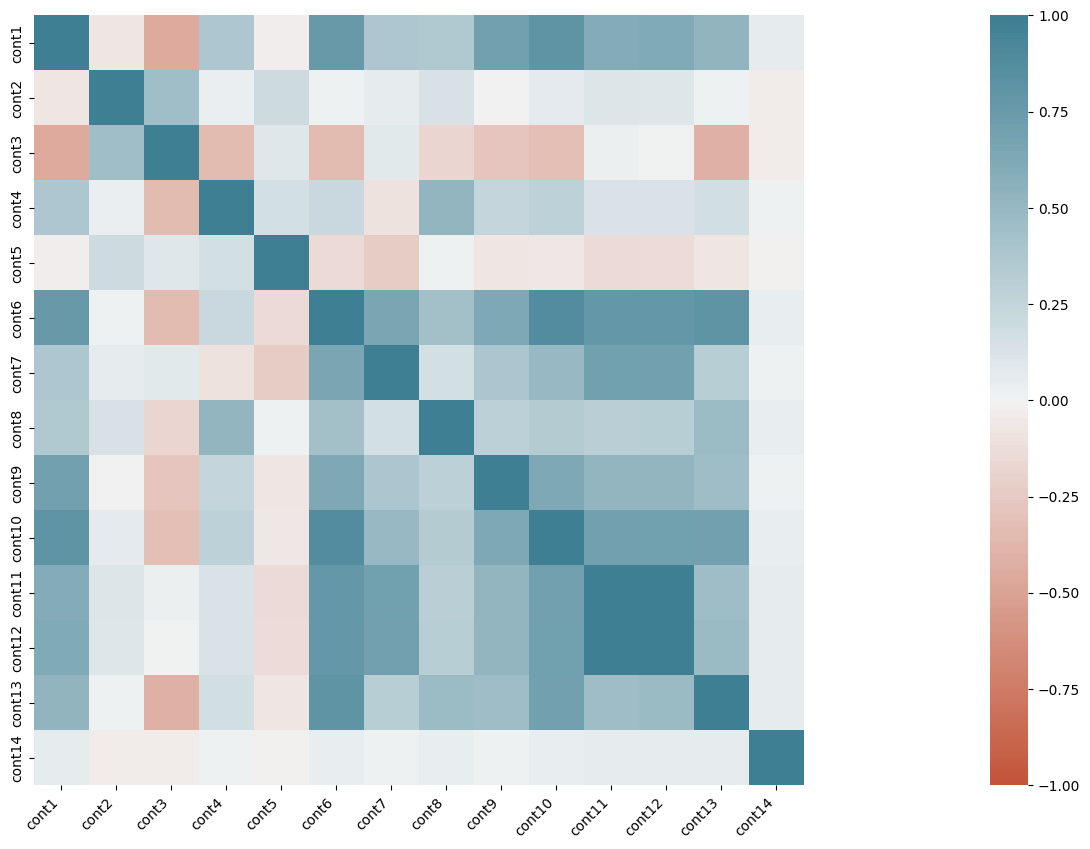

In [27]:

# Perform feature selection for numerical variables
train_data, constant_columns, qconstant_columns, correlated_features = feature_selection_numerical_variables(train_data,0.01,0.75,['loss','id'],)


In [28]:

# Display the correlated features
correlated_features


{'cont10', 'cont12', 'cont6'}

##  8: Handling Correlation Between Categorical Variables

In [29]:
# Define the folder path to store LabelEncoder objects
output_folder = 'label_encoders/'

# Ensure the folder exists, or create it if it doesn't
os.makedirs(output_folder, exist_ok=True)

In [30]:
# Save the encoders to disk to be fitted on test data
for cf1 in categorical_columns:
    le = LabelEncoder()
    le.fit(train_data[cf1].unique())
    # filename = cf1 +".sav"
    filename = output_folder + cf1 +".sav"
    pickle.dump(le, open(filename, 'wb'))
    train_data[cf1] = le.transform(train_data[cf1])


In [31]:

# Snippet to calculate the unique values within categorical columns
df = pd.DataFrame([{'Column_Name': cat, "Count": int(len(train_data[cat].unique()))} for cat in categorical_columns])


In [32]:
   
columns_unique_value = np.array(df.Count.value_counts().index)


In [33]:

# Identify the dependent/correlated categorical variables and drop them
columns_to_drop_cat = set()
correlated_columns = dict()

for unique_value_count in columns_unique_value:
    if unique_value_count > 1:
        categorical_columns = df.loc[df.Count == unique_value_count, 'Column_Name']
        categorical_columns = categorical_columns.reset_index(drop=True)
        columns_length = len(categorical_columns)

        for col in range(columns_length-1):
            column_to_compare = categorical_columns[col]
            columns_compare_against = categorical_columns[(col+1):columns_length]
            chi_scores = chi2(train_data[columns_compare_against], train_data[column_to_compare])

            if column_to_compare not in columns_to_drop_cat:
                columns_to_be_dropped = [i for i in range(len(columns_compare_against)) if chi_scores[1][i] <= 0.05]
                columns_to_drop_array = np.array(columns_compare_against)[columns_to_be_dropped]
                correlated_columns[column_to_compare] = columns_to_drop_array
                columns_to_drop_cat.update(columns_to_drop_array)


In [34]:

# Drop the correlated categorical columns
train_data = train_data.drop(columns_to_drop_cat, axis=1)
train_data

,id,cat1,cat15,cat22,cat32,cat73,cat75,cat77,cat88,cat89,cat90,cat93,cat94,cat95,cat96,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat108,cat109,cat110,cat112,cat113,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont7,cont8,cont9,cont11,cont13,cont14,loss
0,1,0,0,0,0,0,1,3,0,0,0,3,1,2,4,15,1,6,0,0,8,4,6,45,28,19,55,14,269,0.726300,0.245921,0.187583,0.789639,0.310061,0.335060,0.30260,0.67135,0.569745,0.822493,0.714843,2213.18
1,2,0,0,0,0,0,0,3,0,0,0,3,3,2,4,15,11,5,0,0,4,4,10,33,65,22,38,14,85,0.330514,0.737068,0.592681,0.614134,0.885834,0.436585,0.60087,0.35127,0.338312,0.611431,0.304496,1283.60
2,5,0,0,0,0,0,0,3,0,0,0,3,3,2,4,1,11,14,0,1,4,5,0,2,85,28,5,8,153,0.261841,0.358319,0.484196,0.236924,0.397069,0.315545,0.27320,0.26076,0.381398,0.195709,0.774425,3005.09
3,10,1,0,0,0,1,0,3,0,0,0,3,3,2,4,15,8,3,0,0,4,4,10,33,67,39,4,14,79,0.321594,0.555782,0.527991,0.373816,0.422268,0.391128,0.31796,0.32128,0.327915,0.605077,0.602642,939.85
4,11,0,0,0,0,0,0,3,0,0,0,3,1,3,4,12,5,9,0,0,3,4,1,66,50,50,38,10,55,0.273204,0.159990,0.527991,0.473202,0.704268,0.247408,0.24564,0.22089,0.204687,0.246011,0.432606,2763.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,587620,0,0,0,0,1,0,3,0,0,0,3,3,3,4,12,8,3,0,0,3,4,1,33,106,32,38,11,55,0.347403,0.785784,0.613660,0.473202,0.939556,0.289949,0.24564,0.30859,0.223038,0.333292,0.208216,1198.62
188314,587624,0,0,0,0,0,0,3,0,0,0,3,3,3,4,12,10,0,0,0,4,4,1,33,44,22,20,9,75,0.507661,0.555782,0.549770,0.802892,0.704268,0.382000,0.63475,0.40455,0.307628,0.318646,0.305872,1108.34
188315,587630,0,0,0,0,0,0,3,0,0,0,3,3,3,4,12,5,2,2,0,4,5,1,33,87,48,5,10,79,0.484469,0.785784,0.792378,0.189137,0.482436,0.370534,0.24564,0.45808,0.445614,0.339244,0.503888,5762.64
188316,587632,0,0,0,0,0,1,3,0,0,0,2,3,2,4,15,11,9,0,0,10,6,10,33,9,19,9,14,295,0.438385,0.422197,0.298977,0.383428,0.340543,0.562866,0.34987,0.44767,0.863052,0.654753,0.721707,1562.87


In [35]:

# Combine correlated numerical and categorical features to create a list of all columns to drop
correlated_features = list(correlated_features)
columns_to_drop_cat = list(columns_to_drop_cat)
columns_to_drop_cat.extend(correlated_features)
columns_to_drop = columns_to_drop_cat.copy()
columns_to_drop

['cat61',
 'cat27',
 'cat82',
 'cat14',
 'cat5',
 'cat28',
 'cat36',
 'cat71',
 'cat54',
 'cat52',
 'cat19',
 'cat87',
 'cat70',
 'cat72',
 'cat33',
 'cat59',
 'cat8',
 'cat53',
 'cat38',
 'cat43',
 'cat47',
 'cat50',
 'cat17',
 'cat65',
 'cat74',
 'cat20',
 'cat97',
 'cat42',
 'cat84',
 'cat16',
 'cat24',
 'cat46',
 'cat49',
 'cat51',
 'cat9',
 'cat29',
 'cat55',
 'cat60',
 'cat107',
 'cat48',
 'cat18',
 'cat114',
 'cat26',
 'cat39',
 'cat92',
 'cat62',
 'cat31',
 'cat64',
 'cat6',
 'cat11',
 'cat91',
 'cat111',
 'cat79',
 'cat44',
 'cat35',
 'cat81',
 'cat23',
 'cat86',
 'cat58',
 'cat34',
 'cat10',
 'cat25',
 'cat45',
 'cat12',
 'cat57',
 'cat63',
 'cat98',
 'cat56',
 'cat2',
 'cat80',
 'cat40',
 'cat7',
 'cat78',
 'cat21',
 'cat41',
 'cat37',
 'cat3',
 'cat76',
 'cat106',
 'cat68',
 'cat66',
 'cat69',
 'cat30',
 'cat13',
 'cat4',
 'cat83',
 'cat85',
 'cat67',
 'cont12',
 'cont6',
 'cont10']

In [36]:

# Output the columns_to_drop to a CSV file
columns_to_drop_df = pd.DataFrame(columns_to_drop, columns=['colnames'])
columns_to_drop_df.to_csv("columns_to_drop.csv", index=False)
columns_to_drop_df

,colnames
0,cat61
1,cat27
2,cat82
3,cat14
4,cat5
...,...
86,cat85
87,cat67
88,cont12
89,cont6


##  9: Visualizing the Output Variable

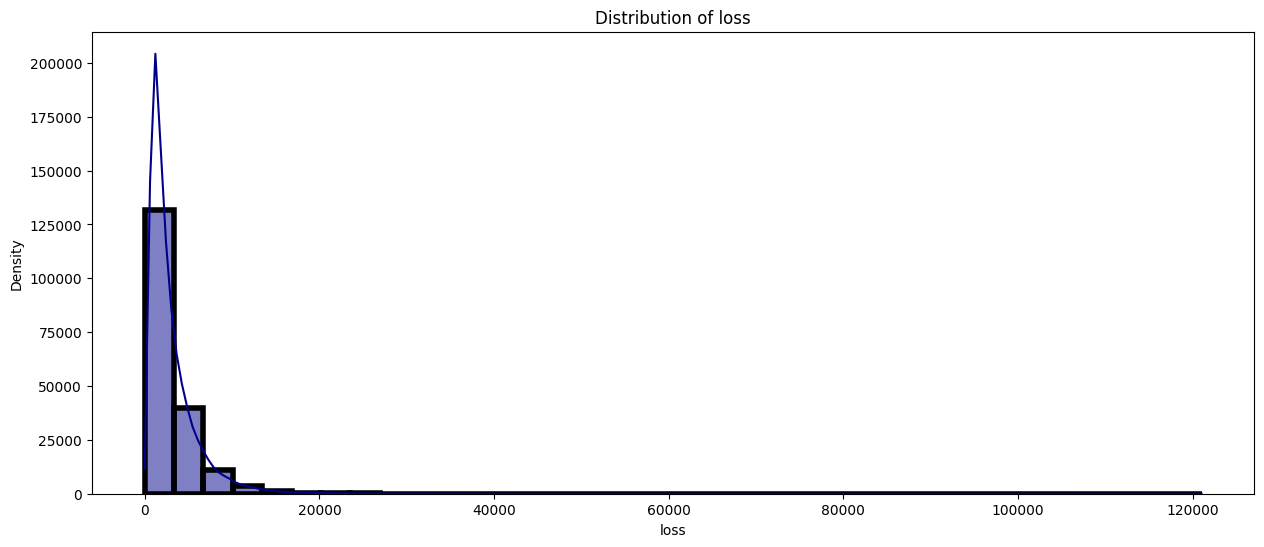

In [37]:
# Visualize the distribution of the 'loss' variable
# Density Plot and Histogram of 'loss'

# sns.distplot( train_data['loss'], hist=True, kde=True, 
#               bins=int(180/5), color='darkblue', 
#               hist_kws={'edgecolor': 'black'},
#               kde_kws={'linewidth': 4}
#             )

plt.figure(figsize=(15, 6))
# Create a histogram and density plot of 'loss' using sns.histplot
sns.histplot(data=train_data, x='loss', bins=int(180/5), kde=True, color='darkblue', edgecolor='black', linewidth=4)

# Add labels and title
plt.xlabel('loss')
plt.ylabel('Density')
plt.title('Distribution of loss')

# Show the plot
plt.show()


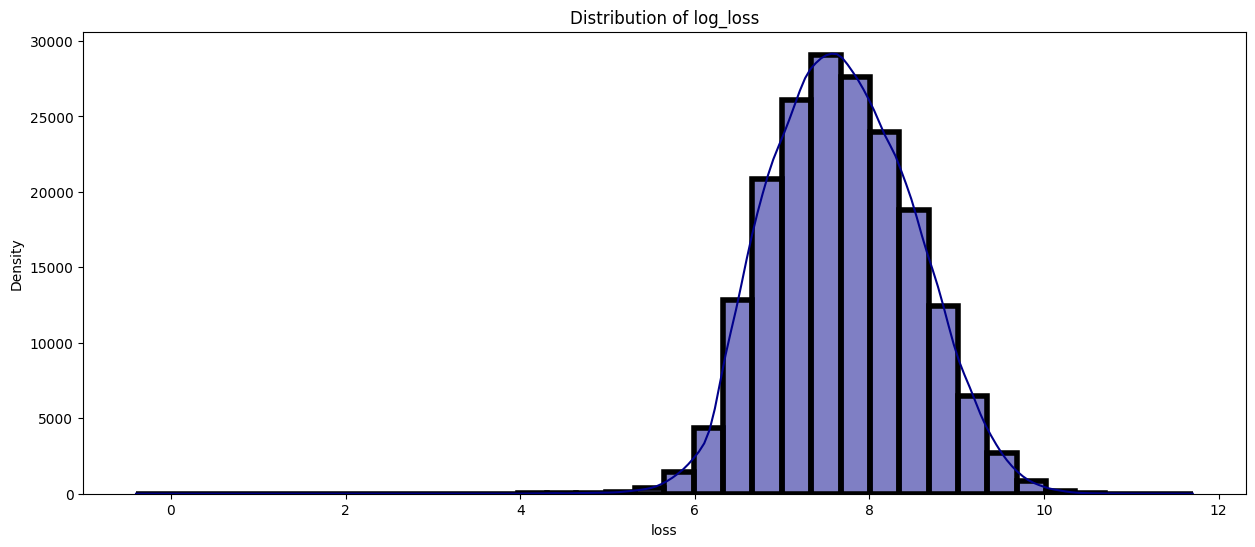

In [38]:

# Visualize the distribution of 'loss' after log transformation
# Density Plot and Histogram of 'loss'

# # Apply a log transformation on the dependent variable to reduce the scale
# train_data['loss'] = np.log(train_data['loss'])

# sns.distplot(train_data['loss'], hist=True, kde=True, 
#              bins=int(180/5), color='darkblue', 
#              hist_kws={'edgecolor': 'black'},
#              kde_kws={'linewidth': 4})

# Apply a log transformation to 'loss'
train_data['loss'] = np.log(train_data['loss'])

plt.figure(figsize=(15, 6))

# Create a histogram and density plot of 'log_loss' using sns.histplot
sns.histplot(train_data['loss'], bins=int(180/5), kde=True, color='darkblue', edgecolor='black', linewidth=4)

# Add labels and title
plt.xlabel('loss')
plt.ylabel('Density')
plt.title('Distribution of log_loss')

# Show the plot
plt.show()

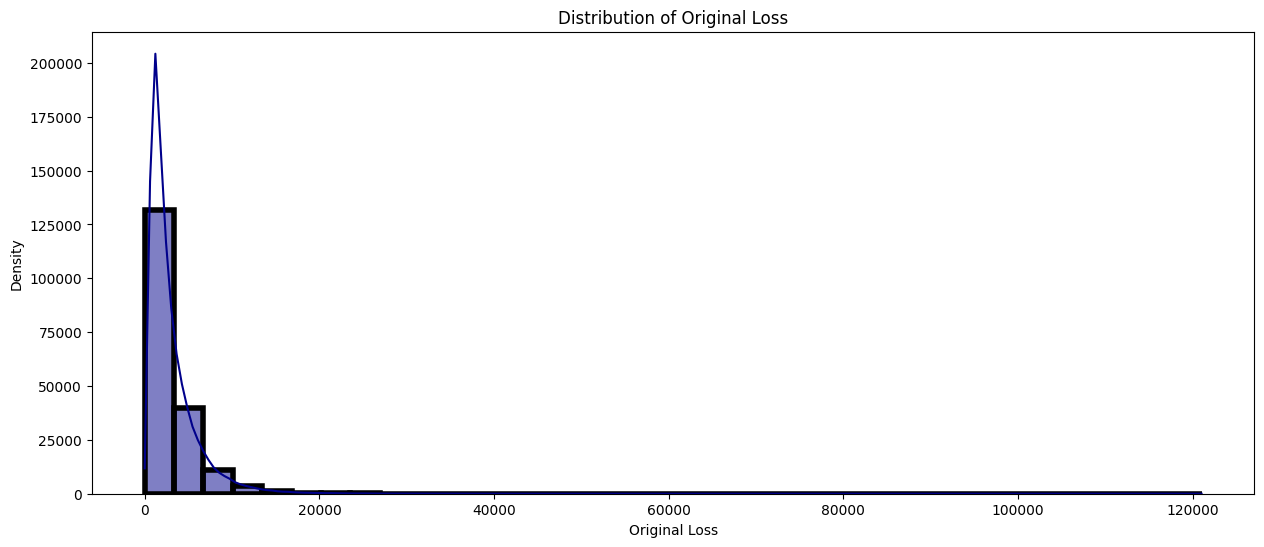

In [39]:

# Apply anti-log to transform the variable back to its original scale

# sns.distplot(np.exp(train_data['loss']), hist=True, kde=True, 
#              bins=int(180/5), color='darkblue', 
#              hist_kws={'edgecolor': 'black'},
#              kde_kws={'linewidth': 4})

# Apply anti-log to transform the 'log_loss' variable back to its original scale
original_loss = np.exp(train_data['loss'])

plt.figure(figsize=(15, 6))

# Create a histogram and density plot of the original 'loss' using sns.histplot
sns.histplot(original_loss, bins=int(180/5), kde=True, color='darkblue', edgecolor='black', linewidth=4)

# Add labels and title
plt.xlabel('Original Loss')
plt.ylabel('Density')
plt.title('Distribution of Original Loss')

# Show the plot
plt.show()


##  10 : Fit a Machine Learning Model

## Random Forest Regressor

In [40]:
# Convert the int64 columns to categorical
Column_datatypes= train_data.dtypes
Integer_columns = list(Column_datatypes.where(lambda x: x =="int64").dropna().index.values)
train_data[Integer_columns] = train_data[Integer_columns].astype('category',copy=False)


In [41]:

# Split the data into features (X) and target (y)
X,y = train_data.drop(['id','loss'],axis=1),train_data['loss']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [42]:

# Instantiate a base Random Forest Regressor model
rf_base = RandomForestRegressor(n_estimators = 100, random_state = 42, oob_score = True)
rf_base.fit(X_train, y_train)


RandomForestRegressor(oob_score=True, random_state=42)

In [43]:

# Save the base model to disk
pickle.dump(rf_base, open("basemodel_rf", 'wb'))


In [44]:

# Load the saved model and predict on the test data
basedmodel_rf = pickle.load(open("basemodel_rf", 'rb'))


In [45]:

# Validate the accuracy of the base model
Y_test_predict_base = basedmodel_rf.predict(X_test)
print("Base model accuracy:",np.sqrt(mean_squared_error(y_test, Y_test_predict_base)))


Base model accuracy: 0.6664983219618766


## Hyperparameter Tuning Using RandomSearchCV

In [46]:
# Define hyperparameter search space
n_estimators = [100, 200, 300, 400, 500] # Number of trees
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num=11)] # Maximum number of levels in tree
min_samples_split = [200, 400, 600] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False] # Method of selecting samples for training each tree

# Create the random grid
random_grid =   {
                    'n_estimators': n_estimators,
                    'max_features': max_features,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'bootstrap': bootstrap
                }


In [47]:

# Create a base Random Forest Regressor model to tune
rf = RandomForestRegressor()

# Perform RandomizedSearchCV to find the best hyperparameters
rf_tuned = RandomizedSearchCV(
                                estimator=rf, param_distributions=random_grid, cv=3, n_iter=5, verbose=2, random_state=42, n_jobs=-1
                             )

# Fit the random search model
rf_tuned.fit(X_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


c:\Users\divya\Github\PredictiveModelingForInsuranceLossEstimation\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
6 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\divya\Github\PredictiveModelingForInsuranceLossEstimation\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\divya\Github\PredictiveModelingForInsuranceLossEstimation\.venv\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\divya\Github\PredictiveMode

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [200, 400, 600],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [48]:

# Save the tuned model to disk
pickle.dump(rf_tuned, open("tunedmodel_rf", 'wb'))

# Check the best hyperparameters
rf_tuned.best_params_


{'n_estimators': 200,
 'min_samples_split': 200,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [49]:

# Load the saved tuned model and predict on the test data
tunedmodel_rf = pickle.load(open("tunedmodel_rf", 'rb'))

Y_test_predict_tuned = tunedmodel_rf.predict(X_test)
print("Tuned model accuracy:", np.sqrt(mean_squared_error(y_test, Y_test_predict_tuned)))


Tuned model accuracy: 0.6530710047601802


## Gradient Boosting Regressor

In [50]:
# Fit a Gradient Boosting Regressor (GBM) model
gbm_base = GradientBoostingRegressor(
                                        max_depth=2,
                                        n_estimators=3,
                                        learning_rate=1.0
                                    )

gbm_base.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [51]:

# Save the GBM model to disk
pickle.dump(gbm_base, open("basemodel_GBM", 'wb'))


In [52]:

# Load the saved GBM model and predict on the test data
basemodel_GBM = pickle.load(open("basemodel_GBM", 'rb'))
Y_test_predict_tuned = basemodel_GBM.predict(X_test)
print("Base model GBM accuracy:", np.sqrt(mean_squared_error(y_test, Y_test_predict_tuned)))


Base model GBM accuracy: 0.7004418131911399
